In [1]:
from pandas import *
from seaborn import *
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from numpy import *
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest,chi2
from mpl_toolkits import mplot3d
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE 

In [2]:
t=read_csv('train (1).csv')
t.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
943,944,90,RL,100.0,25000,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,143000
546,547,50,RL,70.0,8737,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,210000
643,644,60,RL,80.0,10793,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,4,2007,WD,Normal,152000
712,713,120,RL,40.0,4671,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,10,2008,WD,Normal,189000
1294,1295,20,RL,60.0,8172,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,115000


In [3]:
t[t.isnull().any(axis=1)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
t.shape

(1460, 81)

In [5]:
t.drop(['Id','Alley','PoolQC','MiscFeature','Fence','FireplaceQu'],axis=1,inplace=True)

In [6]:
t.LotFrontage

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

In [7]:
def pdf(y):
    o=[]
    m=mean(y)
    s=std(y)
    for i in y:
        o.append(1/(s*sqrt(2*pi))*exp(-(i-m)**2/(2*s**2)))
    return o

In [8]:
def per(y):
    l=[]
    q1,q2=percentile(sorted(y),[25,75])
    iqr=q2-q1
    low=q1-(1.5*iqr)
    high=q2+(1.5*iqr)
    l.append(low)
    l.append(high)
    return l

In [9]:
t1=t.LotFrontage
t1.dropna(inplace=True)

C:\Users\boddu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LotFrontage'>

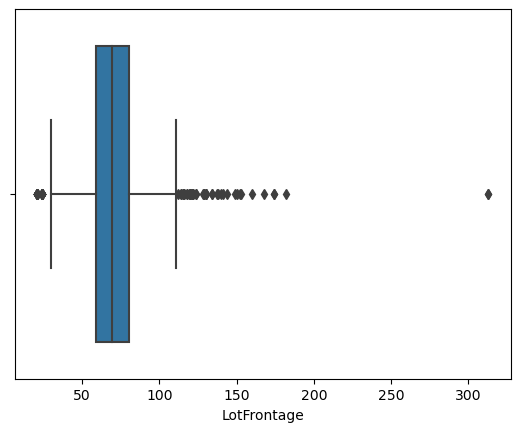

In [10]:
boxplot(t.LotFrontage)

In [11]:
l=per(t1)

In [12]:
l

[27.5, 111.5]

In [13]:
t1.median()

69.0

In [14]:
t.LotFrontage.fillna(t1.median(),inplace=True)

In [15]:
t=t[t.LotFrontage>31.5]

In [16]:
t=t[t.LotFrontage<107.5]

In [17]:
s=StandardScaler()
t.LotFrontage=s.fit_transform(array(t.LotFrontage).reshape(-1,1))

C:\Users\boddu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LotFrontage'>

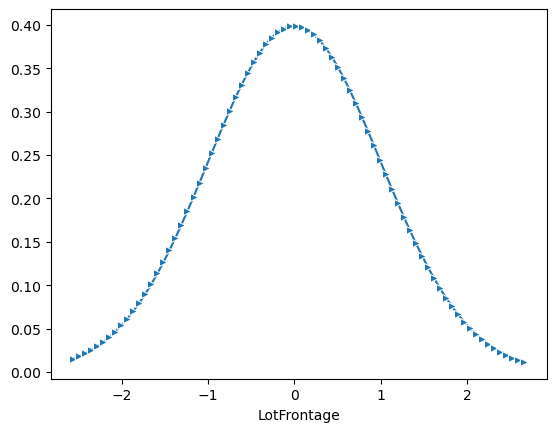

In [18]:
lineplot(t.LotFrontage,pdf(t.LotFrontage),marker='>')

In [19]:
t.MSZoning

0       RL
1       RL
2       RL
3       RL
4       RL
        ..
1455    RL
1456    RL
1457    RL
1458    RL
1459    RL
Name: MSZoning, Length: 1354, dtype: object

In [20]:
t.MSZoning.value_counts()

RL         1091
RM          183
FV           55
RH           16
C (all)       9
Name: MSZoning, dtype: int64

In [21]:
l=LabelEncoder()
t.MSZoning=l.fit_transform(t.MSZoning)

In [22]:
t.Street.value_counts()

Pave    1350
Grvl       4
Name: Street, dtype: int64

In [23]:
t.drop('Street',inplace=True,axis=1)

In [24]:
l=per(t.LotArea)

In [25]:
l

[2255.5, 16891.5]

In [26]:
t=t[t.LotArea>2255.5]

In [27]:
t=t[t.LotArea<16891.5]

C:\Users\boddu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LotArea'>

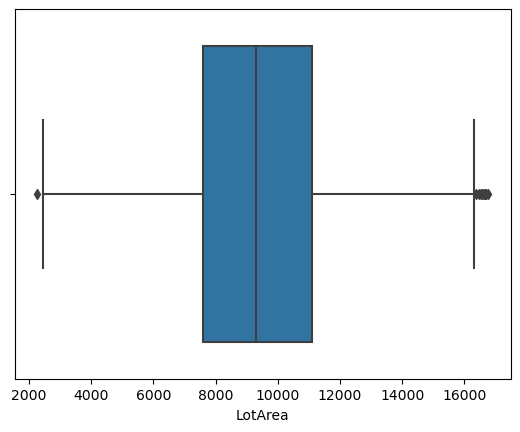

In [28]:
boxplot(t.LotArea)

In [29]:
t.LotArea=s.fit_transform(array(t.LotArea).reshape(-1,1))

C:\Users\boddu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LotArea'>

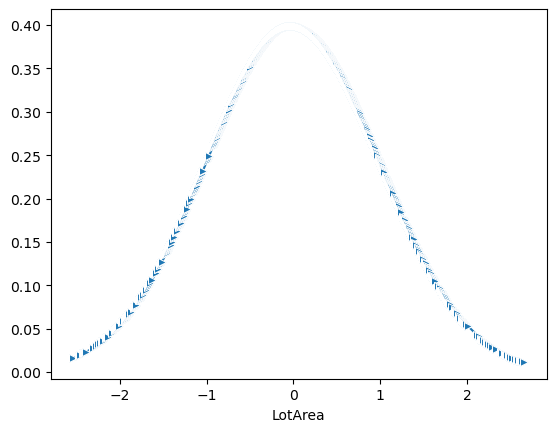

In [30]:
lineplot(t.LotArea,pdf(t.LotArea),marker='>')

In [31]:
t['LotShape']=LabelEncoder().fit_transform(t.LotShape)

In [32]:
t.LotShape.value_counts()

3    828
0    433
1     24
2      3
Name: LotShape, dtype: int64

In [33]:
t.LandContour.value_counts()

Lvl    1177
Bnk      52
HLS      41
Low      18
Name: LandContour, dtype: int64

In [34]:
t['LandContour']=LabelEncoder().fit_transform(t.LandContour)

In [35]:
t.Utilities.value_counts()

AllPub    1287
NoSeWa       1
Name: Utilities, dtype: int64

In [36]:
t.drop('Utilities',axis=1,inplace=True)

In [37]:
t.LotConfig.value_counts()

Inside     943
Corner     227
CulDSac     73
FR2         42
FR3          3
Name: LotConfig, dtype: int64

In [38]:
t['LotConfig']=LabelEncoder().fit_transform(t.LotConfig)

In [39]:
t.LandSlope.value_counts()

Gtl    1236
Mod      49
Sev       3
Name: LandSlope, dtype: int64

In [40]:
t.drop('LandSlope',axis=1,inplace=True)

In [41]:
t.Neighborhood.value_counts()

NAmes      214
CollgCr    144
OldTown    108
Edwards     89
Somerst     71
Sawyer      69
NWAmes      68
Gilbert     67
NridgHt     66
SawyerW     57
BrkSide     57
Crawfor     44
Mitchel     40
IDOTRR      35
NoRidge     33
Timber      31
SWISU       25
StoneBr     22
Blmngtn     17
ClearCr     13
Veenker      8
MeadowV      6
NPkVill      4
Name: Neighborhood, dtype: int64

In [42]:
t['Neighborhood']=LabelEncoder().fit_transform(t.Neighborhood)

In [43]:
t.Condition1.value_counts()

Norm      1115
Feedr       72
Artery      41
RRAn        23
PosN        16
RRAe        11
PosA         4
RRNn         4
RRNe         2
Name: Condition1, dtype: int64

In [44]:
t.Condition2.value_counts()

Norm      1276
Feedr        6
Artery       2
RRNn         2
PosA         1
RRAn         1
Name: Condition2, dtype: int64

In [45]:
t.drop(['Condition1','Condition2'],axis=1,inplace=True)

In [46]:
t.BldgType.value_counts()

1Fam      1105
TwnhsE      97
Duplex      49
2fmCon      28
Twnhs        9
Name: BldgType, dtype: int64

In [47]:
t['BldgType']=LabelEncoder().fit_transform(t.BldgType)

In [48]:
t.HouseStyle.value_counts()

1Story    661
2Story    363
1.5Fin    143
SLvl       59
SFoyer     31
1.5Unf     14
2.5Unf     11
2.5Fin      6
Name: HouseStyle, dtype: int64

In [49]:
t['HouseStyle']=LabelEncoder().fit_transform(t.HouseStyle)

In [50]:
t.OverallQual.value_counts()

5     362
6     323
7     284
8     151
4      99
9      34
3      19
10     11
2       3
1       2
Name: OverallQual, dtype: int64

In [51]:
t.OverallCond.value_counts()

5    718
6    229
7    184
8     67
4     44
3     22
9     18
2      5
1      1
Name: OverallCond, dtype: int64

<AxesSubplot:>

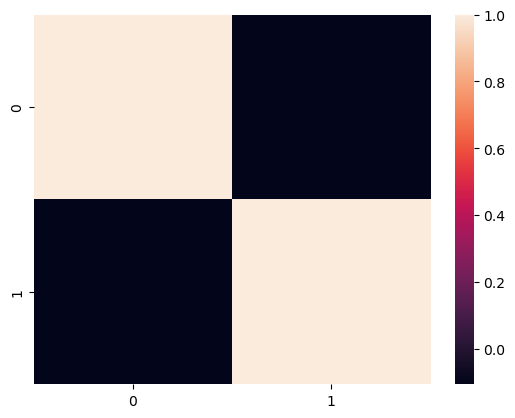

In [52]:
heatmap(corrcoef(t.OverallCond,t.OverallQual))

In [53]:
t.drop('OverallCond',axis=1,inplace=True)

In [54]:
t.YearBuilt=t.YearBuilt-min(t.YearBuilt)

In [55]:
t.YearRemodAdd=t.YearRemodAdd-min(t.YearRemodAdd)

In [56]:
corrcoef(t.YearRemodAdd,t.YearBuilt)

array([[1.        , 0.60037118],
       [0.60037118, 1.        ]])

In [57]:
t.RoofStyle.value_counts()

Gable      1015
Hip         250
Gambrel      11
Mansard       7
Flat          5
Name: RoofStyle, dtype: int64

In [58]:
t['RoofStyle']=LabelEncoder().fit_transform(t.RoofStyle)

In [59]:
t.RoofMatl.value_counts()

CompShg    1276
Tar&Grv       5
WdShake       4
WdShngl       2
Roll          1
Name: RoofMatl, dtype: int64

In [60]:
t.drop('RoofMatl',axis=1,inplace=True)

In [61]:
t.Exterior1st.value_counts().shape

(15,)

In [62]:
t.Exterior2nd.value_counts().shape

(16,)

In [63]:
t.drop('Exterior1st',axis=1,inplace=True)

In [64]:
t.Exterior2nd=LabelEncoder().fit_transform(t.Exterior2nd)

In [65]:
t.MasVnrType.value_counts()

None       769
BrkFace    388
Stone      112
BrkCmn      12
Name: MasVnrType, dtype: int64

In [66]:
t.MasVnrArea.value_counts()

0.0      768
180.0      8
108.0      8
72.0       8
200.0      6
        ... 
209.0      1
472.0      1
263.0      1
436.0      1
119.0      1
Name: MasVnrArea, Length: 294, dtype: int64

In [67]:
t.drop('MasVnrArea',axis=1,inplace=True)

In [68]:
t.MasVnrType=LabelEncoder().fit_transform(t.MasVnrType)

In [69]:
t.ExterQual.value_counts()

TA    805
Gd    426
Ex     45
Fa     12
Name: ExterQual, dtype: int64

In [70]:
t.ExterCond.value_counts()

TA    1133
Gd     124
Fa      27
Ex       3
Po       1
Name: ExterCond, dtype: int64

In [71]:
t.drop('ExterQual',axis=1,inplace=True)

In [72]:
t.ExterCond=LabelEncoder().fit_transform(t.ExterCond)

In [73]:
t.Foundation.value_counts()

PConc     579
CBlock    541
BrkTil    137
Slab       23
Stone       6
Wood        2
Name: Foundation, dtype: int64

In [74]:
t.Foundation=LabelEncoder().fit_transform(t.Foundation)

In [75]:
t.BsmtQual.value_counts()

TA    581
Gd    539
Ex    100
Fa     33
Name: BsmtQual, dtype: int64

In [76]:
t.BsmtCond.value_counts()

TA    1154
Gd      56
Fa      41
Po       2
Name: BsmtCond, dtype: int64

In [77]:
t.BsmtQual=LabelEncoder().fit_transform(t.BsmtQual)
t.BsmtCond=LabelEncoder().fit_transform(t.BsmtCond)

In [78]:
t=t[t.BsmtCond!=2]

In [79]:
corrcoef(t.BsmtCond,t.BsmtQual)

array([[1.        , 0.07364635],
       [0.07364635, 1.        ]])

In [80]:
t.BsmtExposure.value_counts()

No    857
Av    189
Gd    102
Mn    102
Name: BsmtExposure, dtype: int64

In [81]:
t.BsmtExposure=LabelEncoder().fit_transform(t.BsmtExposure)

In [82]:
t.drop(['BsmtFinType2','BsmtFinSF2'],axis=1,inplace=True)

In [83]:
t.BsmtFinType1.value_counts()

Unf    379
GLQ    370
ALQ    191
BLQ    126
Rec    121
LwQ     64
Name: BsmtFinType1, dtype: int64

In [84]:
t.BsmtFinType1.fillna('Unf',inplace=True)

In [85]:
t.BsmtFinType1=LabelEncoder().fit_transform(t.BsmtFinType1)

In [86]:
t.Heating.value_counts()

GasA     1257
GasW       16
Grav        6
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

In [87]:
t.drop(['Heating'],axis=1,inplace=True)

In [88]:
t.HeatingQC.value_counts()

Ex    655
TA    370
Gd    218
Fa     42
Po      1
Name: HeatingQC, dtype: int64

In [89]:
t=t[t.HeatingQC!='Po']

In [90]:
t.HeatingQC=LabelEncoder().fit_transform(t.HeatingQC)

In [91]:
t.CentralAir.value_counts()

Y    1197
N      88
Name: CentralAir, dtype: int64

In [92]:
t.CentralAir=LabelEncoder().fit_transform(t.CentralAir)

In [93]:
t.dropna(inplace=True)

In [94]:
t.Electrical.value_counts()

SBrkr    1114
FuseA      77
FuseF      21
FuseP       1
Name: Electrical, dtype: int64

In [95]:
t=t[t.Electrical!='FuseP']

In [96]:
t.Electrical=LabelEncoder().fit_transform(t.Electrical)

In [97]:
t['1stFlrSF']

0        856
1       1262
2        920
3        961
4       1145
        ... 
1455     953
1456    2073
1457    1188
1458    1078
1459    1256
Name: 1stFlrSF, Length: 1212, dtype: int64

In [98]:
l=per(t['1stFlrSF'])
l

[188.5, 2090.5]

In [99]:
t=t[t['1stFlrSF']>188.5]
t=t[t['1stFlrSF']<2090.5]

In [100]:
t['1stFlrSF']=s.fit_transform(array(t['1stFlrSF']).reshape(-1,1))

C:\Users\boddu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='1stFlrSF'>

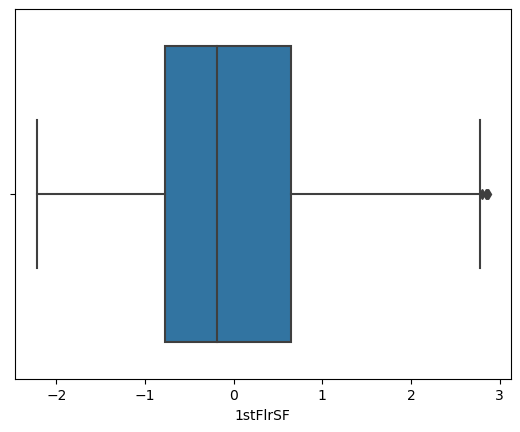

In [101]:
boxplot(t['1stFlrSF'])

C:\Users\boddu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='1stFlrSF'>

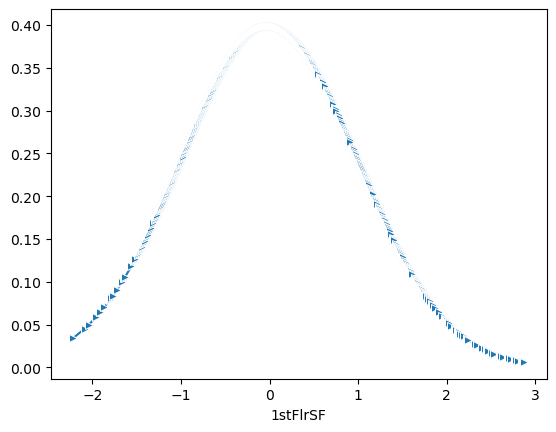

In [102]:
lineplot(t['1stFlrSF'],pdf(t['1stFlrSF']),marker='>')

In [103]:
t['2ndFlrSF'].value_counts()

0       691
728      10
689       5
720       5
862       5
       ... 
600       1
745       1
812       1
595       1
1152      1
Name: 2ndFlrSF, Length: 360, dtype: int64

In [104]:
t.drop(['2ndFlrSF'],axis=1,inplace=True)

In [105]:
t.LowQualFinSF.value_counts()

0      1181
360       2
528       1
144       1
390       1
420       1
473       1
156       1
53        1
232       1
481       1
120       1
397       1
384       1
Name: LowQualFinSF, dtype: int64

In [106]:
t.drop(['LowQualFinSF'],axis=1,inplace=True)

In [107]:
t.GrLivArea

0       1710
1       1262
2       1786
3       1717
4       2198
        ... 
1455    1647
1456    2073
1457    2340
1458    1078
1459    1256
Name: GrLivArea, Length: 1195, dtype: int64

In [108]:
l=per(t.GrLivArea)
l

[216.25, 2670.25]

In [109]:
t=t[t.GrLivArea>216.25]
t=t[t.GrLivArea<2670.25]

In [110]:
t.GrLivArea=s.fit_transform(array(t.GrLivArea).reshape(-1,1))

C:\Users\boddu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GrLivArea'>

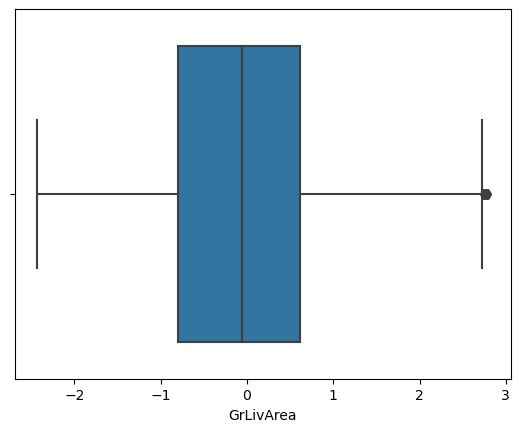

In [111]:
boxplot(t.GrLivArea)

C:\Users\boddu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GrLivArea'>

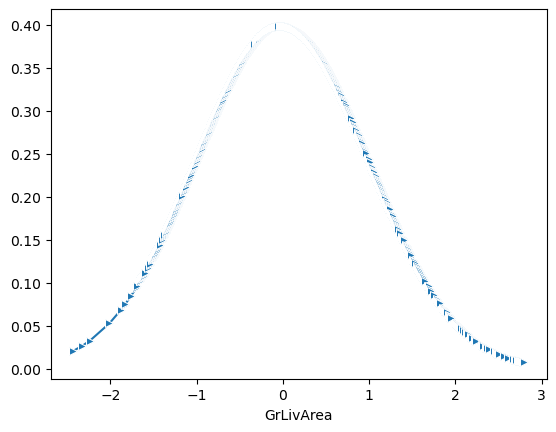

In [112]:
lineplot(t['GrLivArea'],pdf(t['GrLivArea']),marker='>')

In [113]:
t.BsmtFullBath.value_counts()

0    687
1    480
2      6
Name: BsmtFullBath, dtype: int64

In [114]:
t=t[t.BsmtFullBath!=2]

In [115]:
t.BsmtHalfBath.value_counts()

0    1098
1      68
2       1
Name: BsmtHalfBath, dtype: int64

In [116]:
t=t[t.BsmtHalfBath!=2]

In [117]:
t.FullBath.value_counts()

2    618
1    536
3     10
0      2
Name: FullBath, dtype: int64

In [118]:
t=t[t.FullBath!=3]
t=t[t.FullBath!=0]

In [119]:
t.HalfBath.value_counts()

0    741
1    408
2      5
Name: HalfBath, dtype: int64

In [120]:
t=t[t.HalfBath!=2]

In [121]:
t.BedroomAbvGr.value_counts()

3    677
2    286
4    137
1     34
5     10
6      4
0      1
Name: BedroomAbvGr, dtype: int64

In [122]:
t=t[t.BedroomAbvGr!=0]
t=t[t.BedroomAbvGr!=6]

In [123]:
t.KitchenAbvGr.value_counts()

1    1107
2      36
3       1
Name: KitchenAbvGr, dtype: int64

In [124]:
t=t[t.KitchenAbvGr!=2]
t=t[t.KitchenAbvGr!=3]
t.drop(['KitchenAbvGr'],axis=1,inplace=True)

In [125]:
t.KitchenQual.value_counts()

TA    537
Gd    485
Ex     64
Fa     21
Name: KitchenQual, dtype: int64

In [126]:
t.KitchenQual=LabelEncoder().fit_transform(t.KitchenQual)

In [127]:
t.TotRmsAbvGrd.value_counts()

6     344
7     264
5     223
8     132
4      69
9      43
10     20
3       9
11      3
Name: TotRmsAbvGrd, dtype: int64

In [128]:
t=t[t.TotRmsAbvGrd!=11]
t=t[t.TotRmsAbvGrd!=3]

In [129]:
t.Functional.value_counts()

Typ     1033
Min2      25
Min1      23
Mod        6
Maj1       6
Maj2       2
Name: Functional, dtype: int64

In [130]:
t.Functional=LabelEncoder().fit_transform(t.Functional)

In [131]:
t.Fireplaces.value_counts()

1    522
0    511
2     59
3      3
Name: Fireplaces, dtype: int64

In [132]:
t=t[t.Fireplaces!=3]

In [133]:
t.GarageType.value_counts()

Attchd     710
Detchd     307
BuiltIn     58
Basment     13
CarPort      3
2Types       1
Name: GarageType, dtype: int64

In [134]:
t=t[t.GarageType!='2Types']
t=t[t.GarageType!='CarPort']

In [135]:
t.GarageType=LabelEncoder().fit_transform(t.GarageType)

In [136]:
t.GarageYrBlt=t.GarageYrBlt-min(t.GarageYrBlt)

In [137]:
t.GarageYrBlt=s.fit_transform(array(t.GarageYrBlt).reshape(-1,1))

In [138]:
t.GarageFinish.value_counts()

Unf    465
RFn    361
Fin    262
Name: GarageFinish, dtype: int64

In [139]:
t.GarageFinish=LabelEncoder().fit_transform(t.GarageFinish)

In [140]:
t.GarageCars.value_counts()

2    638
1    324
3    124
4      2
Name: GarageCars, dtype: int64

In [141]:
t=t[t.GarageCars!=4]

In [142]:
t.GarageArea

0       548
1       460
2       608
3       642
4       836
       ... 
1455    460
1456    500
1457    252
1458    240
1459    276
Name: GarageArea, Length: 1086, dtype: int64

In [143]:
l=per(t.GarageArea)
l

[16.0, 912.0]

In [144]:
t=t[t.GarageArea>16]
t=t[t.GarageArea<912]

In [145]:
t.GarageArea=s.fit_transform(array(t.GarageArea).reshape(-1,1))

C:\Users\boddu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GarageArea'>

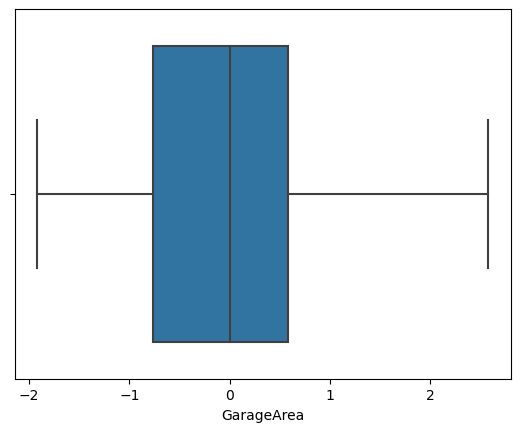

In [146]:
boxplot(t.GarageArea)

C:\Users\boddu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GarageArea'>

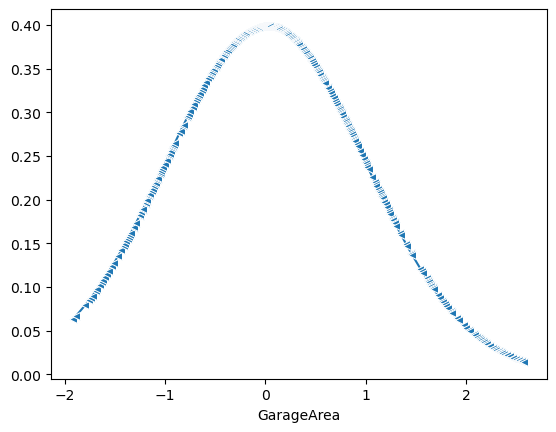

In [147]:
lineplot(t.GarageArea,pdf(t.GarageArea),marker='<')

In [148]:
t.GarageQual.value_counts()

TA    1022
Fa      40
Gd       7
Po       1
Ex       1
Name: GarageQual, dtype: int64

In [149]:
t=t[t.GarageQual!='Po']
t=t[t.GarageQual!='Ex']
t=t[t.GarageQual!='Gd']

In [150]:
t.GarageQual=LabelEncoder().fit_transform(t.GarageQual)

In [151]:
t.GarageCond.value_counts()

TA    1024
Fa      30
Gd       5
Po       3
Name: GarageCond, dtype: int64

In [152]:
t.drop(['GarageCond'],axis=1,inplace=True)

In [153]:
t.PavedDrive.value_counts()

Y    1004
N      38
P      20
Name: PavedDrive, dtype: int64

In [154]:
t.PavedDrive=LabelEncoder().fit_transform(t.PavedDrive)

In [155]:
t.WoodDeckSF.value_counts()

0      544
192     32
100     31
144     27
168     25
      ... 
382      1
179      1
176      1
390      1
736      1
Name: WoodDeckSF, Length: 216, dtype: int64

In [156]:
t.WoodDeckSF=s.fit_transform(array(t.WoodDeckSF).reshape(-1,1))

In [157]:
t.OpenPorchSF.value_counts()

0      460
36      22
20      19
48      19
45      15
      ... 
134      1
154      1
195      1
10       1
169      1
Name: OpenPorchSF, Length: 168, dtype: int64

In [158]:
t.OpenPorchSF=s.fit_transform(array(t.OpenPorchSF).reshape(-1,1))

In [159]:
t.EnclosedPorch.value_counts()

0      914
112     12
96       5
192      4
120      4
      ... 
64       1
67       1
56       1
129      1
99       1
Name: EnclosedPorch, Length: 93, dtype: int64

In [160]:
t.EnclosedPorch=s.fit_transform(array(t.EnclosedPorch).reshape(-1,1))

In [161]:
t['3SsnPorch'].value_counts()

0      1045
144       2
168       2
320       1
407       1
180       1
140       1
508       1
238       1
245       1
196       1
23        1
216       1
96        1
153       1
304       1
Name: 3SsnPorch, dtype: int64

In [162]:
t.drop(['3SsnPorch'],axis=1,inplace=True)

In [163]:
t.ScreenPorch.value_counts()

0      976
192      5
120      5
180      4
126      3
      ... 
145      1
200      1
122      1
260      1
40       1
Name: ScreenPorch, Length: 63, dtype: int64

In [164]:
t.drop(['ScreenPorch'],axis=1,inplace=True)

In [165]:
t.PoolArea.value_counts()

0      1060
648       1
576       1
Name: PoolArea, dtype: int64

In [166]:
t.drop(['PoolArea'],axis=1,inplace=True)

In [167]:
t.MiscVal.value_counts()

0        1023
400        10
500         6
700         4
600         3
480         2
450         2
1200        2
2000        2
54          1
1400        1
620         1
800         1
1300        1
15500       1
350         1
2500        1
Name: MiscVal, dtype: int64

In [168]:
t=t[t.MiscVal==0]
t.drop(['MiscVal'],axis=1,inplace=True)

In [169]:
t.MoSold

0        2
1        5
2        9
3        2
4       12
        ..
1454    10
1455     8
1456     2
1458     4
1459     6
Name: MoSold, Length: 1023, dtype: int64

In [170]:
t.MoSold=s.fit_transform(array(t.MoSold).reshape(-1,1))

In [171]:
t.YrSold=s.fit_transform(array(t.YrSold).reshape(-1,1))

In [172]:
t.SaleType.value_counts()

WD       891
New       86
COD       30
CWD        4
ConLw      4
ConLD      4
ConLI      2
Con        1
Oth        1
Name: SaleType, dtype: int64

In [173]:
j=['CWD','ConLw','ConLD','ConLI','Con','Oth']
for i in j:
    t=t[t.SaleType!=i]

In [174]:
t.SaleType=LabelEncoder().fit_transform(t.SaleType)

In [175]:
t.SaleCondition.value_counts()

Normal     843
Partial     87
Abnorml     63
Family      12
AdjLand      1
Alloca       1
Name: SaleCondition, dtype: int64

In [176]:
t=t[t.SaleCondition!='AdjLand']
t=t[t.SaleCondition!='Alloca']

In [177]:
t.SaleCondition=LabelEncoder().fit_transform(t.SaleCondition)

In [178]:
t['Porch']=t['OpenPorchSF']+t['EnclosedPorch']
t.drop(['EnclosedPorch','OpenPorchSF'],axis=1,inplace=True)

<AxesSubplot:>

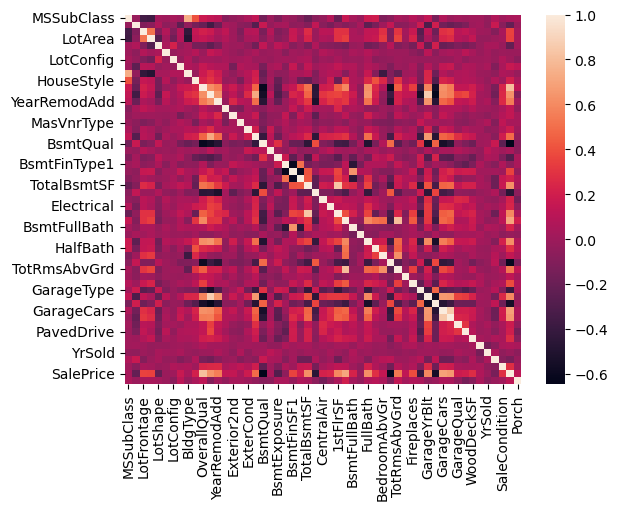

In [179]:
heatmap(t.corr())

In [180]:
c=t.corr()

In [181]:
c[c>0.8]

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,BldgType,HouseStyle,...,GarageArea,GarageQual,PavedDrive,WoodDeckSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Porch
MSSubClass,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MSZoning,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotArea,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotShape,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LandContour,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotConfig,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BldgType,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HouseStyle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [182]:
t.drop(['GarageCars','OverallQual'],axis=1,inplace=True)

In [183]:
t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1005 entries, 0 to 1459
Data columns (total 51 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1005 non-null   int64  
 1   MSZoning       1005 non-null   int32  
 2   LotFrontage    1005 non-null   float64
 3   LotArea        1005 non-null   float64
 4   LotShape       1005 non-null   int32  
 5   LandContour    1005 non-null   int32  
 6   LotConfig      1005 non-null   int32  
 7   Neighborhood   1005 non-null   int32  
 8   BldgType       1005 non-null   int32  
 9   HouseStyle     1005 non-null   int32  
 10  YearBuilt      1005 non-null   int64  
 11  YearRemodAdd   1005 non-null   int64  
 12  RoofStyle      1005 non-null   int32  
 13  Exterior2nd    1005 non-null   int32  
 14  MasVnrType     1005 non-null   int32  
 15  ExterCond      1005 non-null   int32  
 16  Foundation     1005 non-null   int32  
 17  BsmtQual       1005 non-null   int32  
 18  BsmtCond

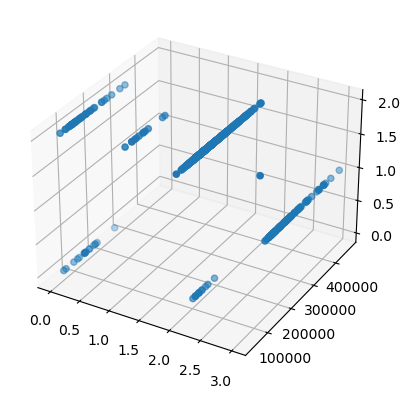

In [184]:
ax=plt.axes(projection='3d')
ax.scatter3D(t.SaleCondition,t.SalePrice,t.SaleType)

In [185]:
t.shape[0]

1005

In [186]:
x_train,x_test,y_train,y_test=train_test_split(t.drop('SalePrice',axis=1),t['SalePrice'],test_size=0.2,random_state=101)

In [241]:
import numpy as np
class Regressor():
    def __init__(self, learning_rate=0.01, tol=0.01, seed=None,normalize=False):
        self.W = None
        self.b = None
        self.__lr = learning_rate
        self.__tol = tol
        self.__length = None
        self.__normalize = normalize
        self.__m = None
        self.__costs = []
        self.__iterations = []
        np.random.seed(seed if seed is not None else np.random.randint(100))
    def __initialize_weights_and_bias(self):
        self.W = np.random.randn(self.__length) #(n,1)
        self.b = 0
    def __computeCost(self,h,Y):
        loss = np.square(h-Y)
        cost = np.sum(loss)/(2*self.__m)
        return cost
    def __optimize(self,X,Y):
        h = np.dot(X,self.W)+self.b
        dW = np.dot( X.T, (h-Y) ) / self.__m
        db = np.sum( h-Y )  / self.__m
        self.W = self.W - self.__lr*dW
        self.b = self.b - self.__lr*db
    def __normalizeX(self,X):return (X-self.__mean) / (self.__std)
    def fit(self, X, y, verbose=False):
        if self.__normalize:
            self.__mean, self.__std = X.mean(axis=0), X.std(axis=0)
            X = self.__normalizeX(X)
        self.__m,self.__length = X.shape
        self.__initialize_weights_and_bias()
        last_cost,i = float('inf'),0
        while True:
            h = np.dot(X,self.W)+self.b
            cost = self.__computeCost(h,y)
            if verbose: print(f"Iteration: {i}, Cost: {cost:.3f}")
            self.__optimize(X,y)
            if last_cost-cost < self.__tol: break
            else: last_cost,i = cost,i+1
            self.__costs.append(cost)
            self.__iterations.append(i)
    def predict(self,X):
        if self.__normalize: X = self.__normalizeX(X)
        return np.dot(X,self.W)+self.b
    def plot(self,figsize=(7,5)):
        plt.figure(figsize=figsize)
        plt.plot(self.__iterations,self.__costs)
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.title("Iterations vs Cost")
        plt.show()
    def score(self,X,y):
        return 1-(np.sum(((y-self.predict(X))**2))/np.sum((y-np.mean(y))**2))

In [242]:
regressor = Regressor(normalize=True)

Train Score: 0.8804138508813262
Test Score:  0.8764541124174581


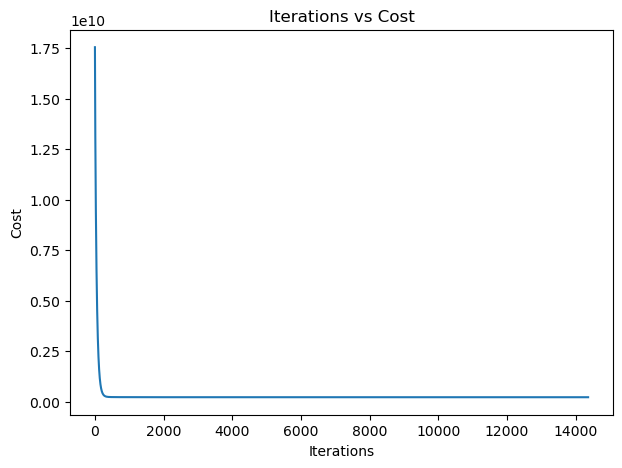

In [244]:
regressor.fit(x_train,y_train)

train_score = regressor.score(x_train,y_train)
test_score = regressor.score(x_test,y_test)

print("Train Score:", train_score)
print("Test Score: ",test_score)
regressor.plot()

In [250]:
k=[]
for i in x_train.columns:
    g=f'Enter the value for {i}:'
    n=float(input(g))
    k.append(n)
print('The house price is:',regressor.predict(k))

Enter the value for MSSubClass:1
Enter the value for MSZoning:1
Enter the value for LotFrontage:1
Enter the value for LotArea:1
Enter the value for LotShape:1
Enter the value for LandContour:1
Enter the value for LotConfig:1
Enter the value for Neighborhood:1
Enter the value for BldgType:1
Enter the value for HouseStyle:1
Enter the value for YearBuilt:1
Enter the value for YearRemodAdd:1
Enter the value for RoofStyle:1
Enter the value for Exterior2nd:1
Enter the value for MasVnrType:1
Enter the value for ExterCond:1
Enter the value for Foundation:1
Enter the value for BsmtQual:1
Enter the value for BsmtCond:1
Enter the value for BsmtExposure:1
Enter the value for BsmtFinType1:1
Enter the value for BsmtFinSF1:1
Enter the value for BsmtUnfSF:1
Enter the value for TotalBsmtSF:1
Enter the value for HeatingQC:1
Enter the value for CentralAir:1
Enter the value for Electrical:1
Enter the value for 1stFlrSF:1
Enter the value for GrLivArea:1
Enter the value for BsmtFullBath:1
Enter the value fo